## Mosquito Dataset

In [527]:
# Import Dataset 
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset
data = pd.read_excel("Mosquito_Dataset.xlsx")


In [528]:
#Remove duplicate rows
data.drop_duplicates(inplace=True)

In [529]:
# Inspect the data
data.shape

(262, 13)

In [530]:
data.head(10)

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
0,kitamilo,spray,CA,yes,NaN,g,3,0,oocyst,oocyst,other,pcr,qpcr
1,kitamilo,spray,MH,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
3,kitamilo,spray,MI,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
4,kitamilo,spray,MI,yes,NaN,c,0,1,spz,spz,H,pcr,qpcr
5,kitamilo,spray,CA,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
6,kitamilo,spray,MH,yes,N,c,0,0,uninfected,uninfected,H,pcr,qpcr
8,kitamilo,spray,MH,yes,N,g,0,0,uninfected,uninfected,H,pcr,qpcr
12,kitamilo,spray,CA,yes,N,g,0,0,uninfected,uninfected,H,pcr,qpcr
13,kitamilo,spray,CA,yes,N,c,0,0,uninfected,uninfected,H,pcr,qpcr
15,kitamilo,spray,MH,yes,N,a,0,0,uninfected,uninfected,H,pcr,qpcr


In [531]:
data.tail()

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
1885,buvuma,spray,MH,yes,NaN,NaN,1,0,oocyst,oocyst,other,ELISA,ELISA
1886,buvuma,spray,MH,yes,NaN,NaN,0,1,spz,spz,H,ELISA,ELISA
1963,buvuma,spray,MH,yes,NaN,NaN,0,1,spz,spz,other,ELISA,ELISA
1973,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,H,ELISA,ELISA
2751,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA


In [532]:
#check the decoration
data.columns

Index(['village', 'collection', 'origin', 'fed', 'parity', 'species.mol ',
       'oocyst', 'spz', 'infection', 'infection1', 'choice', 'RS_tech',
       'spz_tech'],
      dtype='object')

In [533]:
# Rename the species.mol column to prevent errors
mapping = {data.columns[0]:'village', data.columns[1]: 'collection', data.columns[2]:'origin',  data.columns[3]:'fed', data.columns[4]: 'parity',data.columns[5]:'species', data.columns[6]: 'oocyst',data.columns[7]:'spz', data.columns[8]: 'infection',data.columns[9]:'infection1', data.columns[10]: 'choice', data.columns[11]: 'RS_tech',  data.columns[12]: 'spz_tech'}
data = data.rename(columns=mapping)
data.columns

Index(['village', 'collection', 'origin', 'fed', 'parity', 'species', 'oocyst',
       'spz', 'infection', 'infection1', 'choice', 'RS_tech', 'spz_tech'],
      dtype='object')

## Data Examination & Exploration

In [534]:
# Data information
# Data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 2751
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   village     262 non-null    object
 1   collection  262 non-null    object
 2   origin      262 non-null    object
 3   fed         262 non-null    object
 4   parity      106 non-null    object
 5   species     172 non-null    object
 6   oocyst      262 non-null    int64 
 7   spz         262 non-null    int64 
 8   infection   262 non-null    object
 9   infection1  262 non-null    object
 10  choice      262 non-null    object
 11  RS_tech     262 non-null    object
 12  spz_tech    262 non-null    object
dtypes: int64(2), object(11)
memory usage: 28.7+ KB


In [535]:
# Basic data statistics
data.describe()

,oocyst,spz
count,262.000000,262.000000
mean,3.248092,0.225191
std,10.535267,0.418507
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,78.000000,1.000000


In [536]:
# Data statistics for object columns (Text columns)
data.describe(include=object)

,village,collection,origin,fed,parity,species,infection,infection1,choice,RS_tech,spz_tech
count,262,262,262,262,106,172,262,262,262,262,262
unique,3,3,5,2,2,3,3,4,2,2,2
top,bukomansimbi,spray,MH,yes,P,c,uninfected,uninfected,H,ELISA,qpcr
freq,139,185,98,221,74,96,124,124,140,170,231


## Data Cleaning

<Axes: >

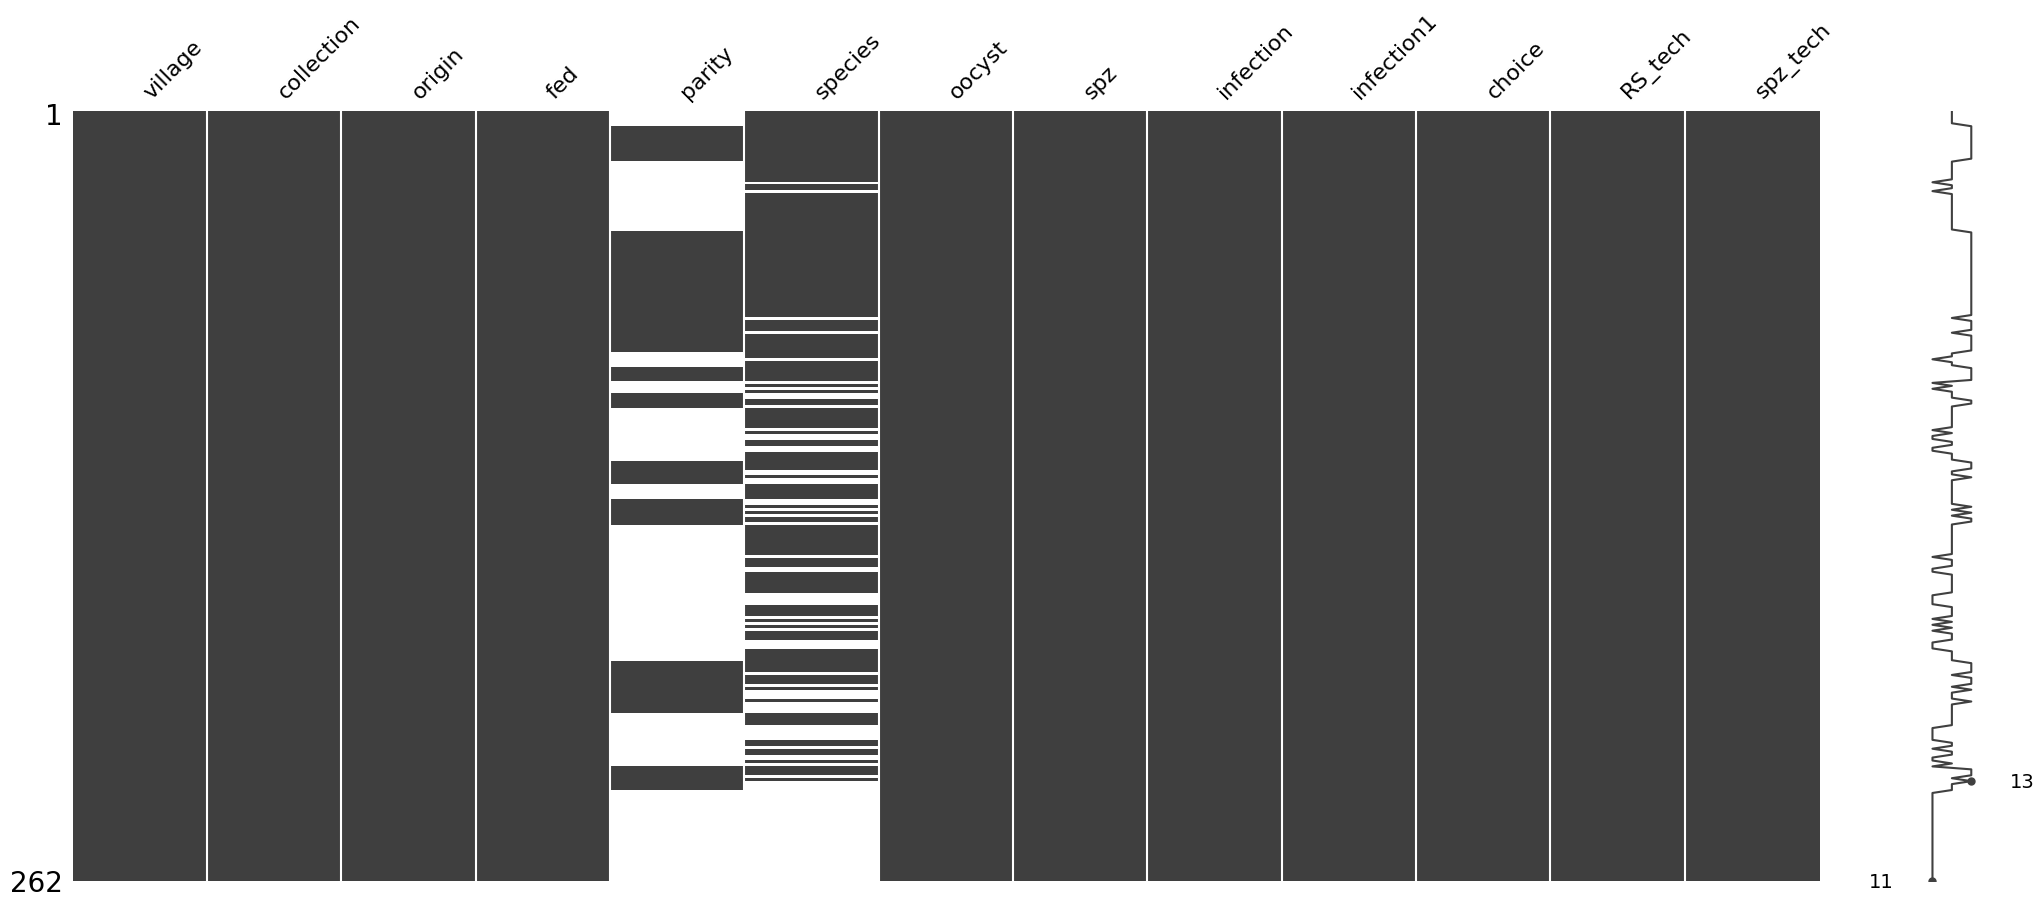

In [537]:
msno.matrix(data)

In [538]:
# Check for missing values
data.isnull().sum()

village         0
collection      0
origin          0
fed             0
parity        156
species        90
oocyst          0
spz             0
infection       0
infection1      0
choice          0
RS_tech         0
spz_tech        0
dtype: int64

In [539]:
# Replace null values with the mode in the species.mol column
data['species'].fillna(data['species'].mode()[0], inplace=True)

In [540]:
# Replace null values with the mode in the parity column
data['parity'].fillna(data['parity'].mode()[0], inplace=True)

In [541]:
# Confirming nulls have been replaced
data.isnull().sum()

village       0
collection    0
origin        0
fed           0
parity        0
species       0
oocyst        0
spz           0
infection     0
infection1    0
choice        0
RS_tech       0
spz_tech      0
dtype: int64

## Data Visualization

In [542]:
# Separate features and target
X = data.drop(columns=['infection'])
y = data['infection']

<Axes: xlabel='infection', ylabel='count'>

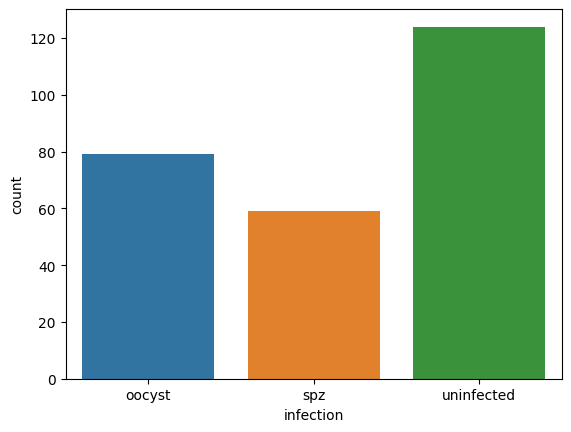

In [543]:
# Plot infection distribution
sns.countplot(x='infection', data=data)